In [109]:
#Set up dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json 
from config import api_key
from pprint import pprint

In [110]:
# Use Pandas to pull in data to create DataFrames

Pet_Set1= pd.read_csv("./Data/animal-data-1.csv")


Cleaned_Pet1 = Pet_Set1.drop_duplicates(subset="id")
Cleaned_Pet1



,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortie,Cat,...,2017-05-13 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
1,15932,2009-12-08 00:00:00,Moving,0,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,2017-04-24 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,...,2017-04-15 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,2017-04-18 00:00:00,Foster,0.0,2018-05-29 00:00:00,Stray,NaN,Died in care,0,0,0
5,31469,2013-03-26 00:00:00,Incompatible with owner lifestyle,0,D1303720,981020007006095,Bonnie,Basenji/Mix,Brown and White,Dog,...,2013-03-30 00:00:00,Adoption,0.0,2017-05-08 00:00:00,Incompatible with owner lifestyle,NaN,Died in care,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10285,64584,2019-08-27 16:52:09,Litter relinquishment,0,C19081429,981020029330984,Max,Domestic Medium Hair,Orange and White,Cat,...,2019-08-29 00:00:00,Adoption,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0
10286,64588,2019-08-27 18:14:11,Stray,0,C19081418,981020033133599,Punkin,Domestic Short Hair,Calico,Cat,...,2019-08-28 00:00:00,Foster,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0
10287,64606,2019-08-29 12:10:21,Stray,0,D19081440,0A1243400C,Dozer,Coonhound,Red,Dog,...,2019-08-29 00:00:00,Reclaimed,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0
10288,64608,2019-08-29 18:58:06,Stray,0,D19081421,982000363034690,Lucy Farmer,Beagle,Tricolour,Dog,...,2019-08-30 00:00:00,Reclaimed,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0


In [111]:
# Determine which animals are most common in an animal shelter?

Question1 = Cleaned_Pet1[['speciesname']].value_counts().rename_axis("speciesname").reset_index(name="Pet Count").set_index("speciesname")
Question1



,Pet Count
speciesname,
Cat,3870
Dog,2868
House Rabbit,170
Rat,122
Guinea Pig,84
Bird,33
Hamster,17
Livestock,16
Gerbil,12


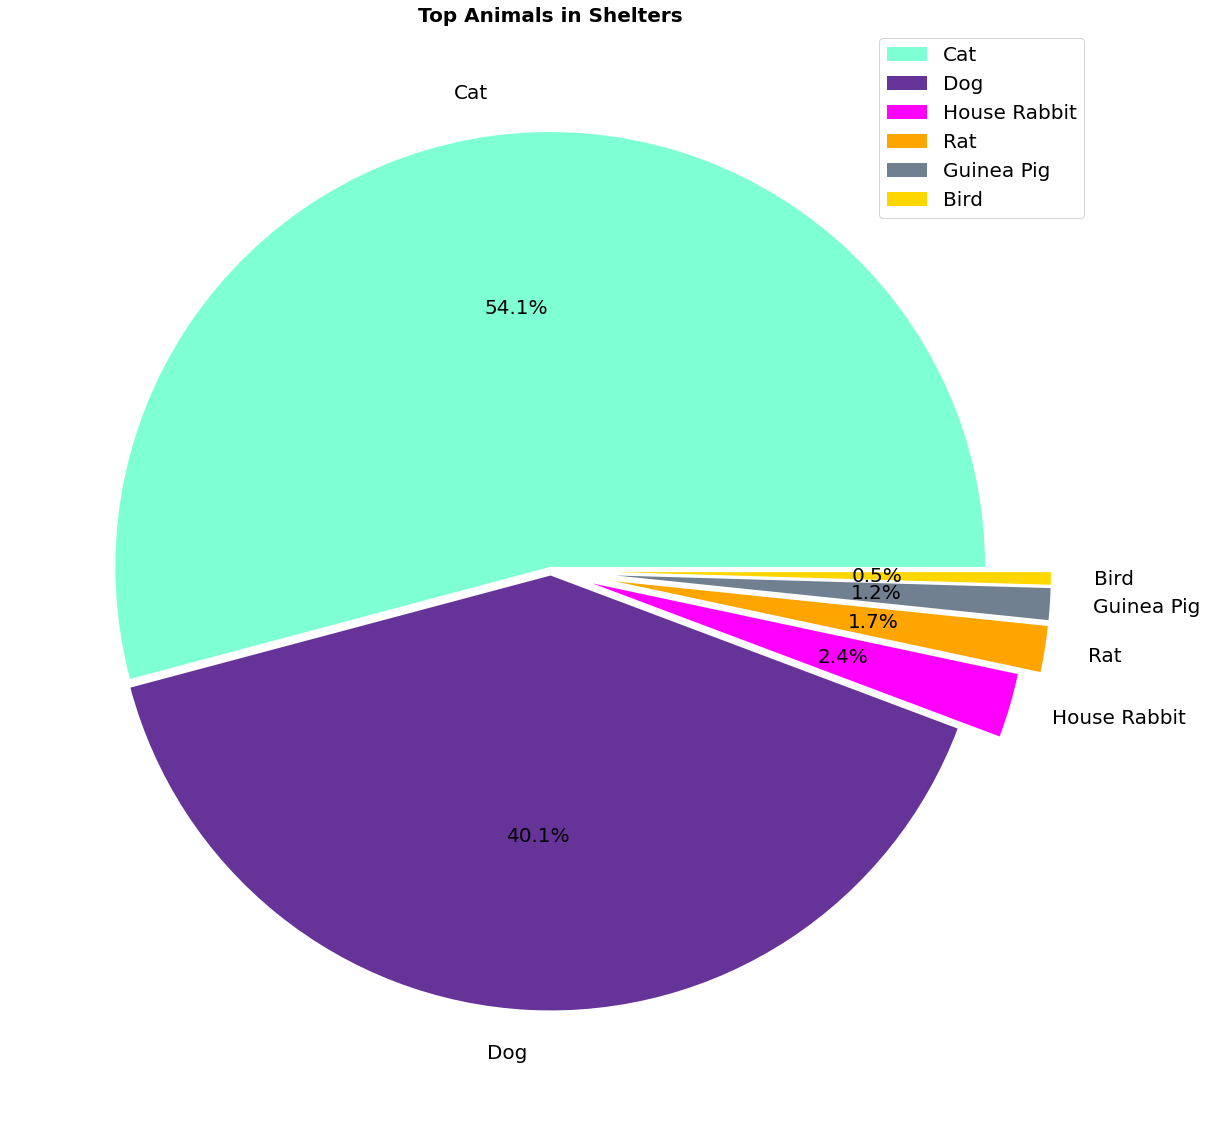

In [115]:
# Create Pie Chart
colors=["aquamarine", "rebeccapurple", "fuchsia", "orange", "slategray", "gold"]
explode = [0.01, 0.01, 0.1, 0.15, 0.15, 0.15]
Question1.head(6).plot(kind="pie", y="Pet Count", figsize=(30,20),autopct="%1.1f%%", colors=colors, fontsize=20, explode=explode)
plt.title("Top Animals in Shelters",fontsize=20, fontweight="bold")
plt.legend(prop={"size":20})
plt.ylabel("")
plt.show()

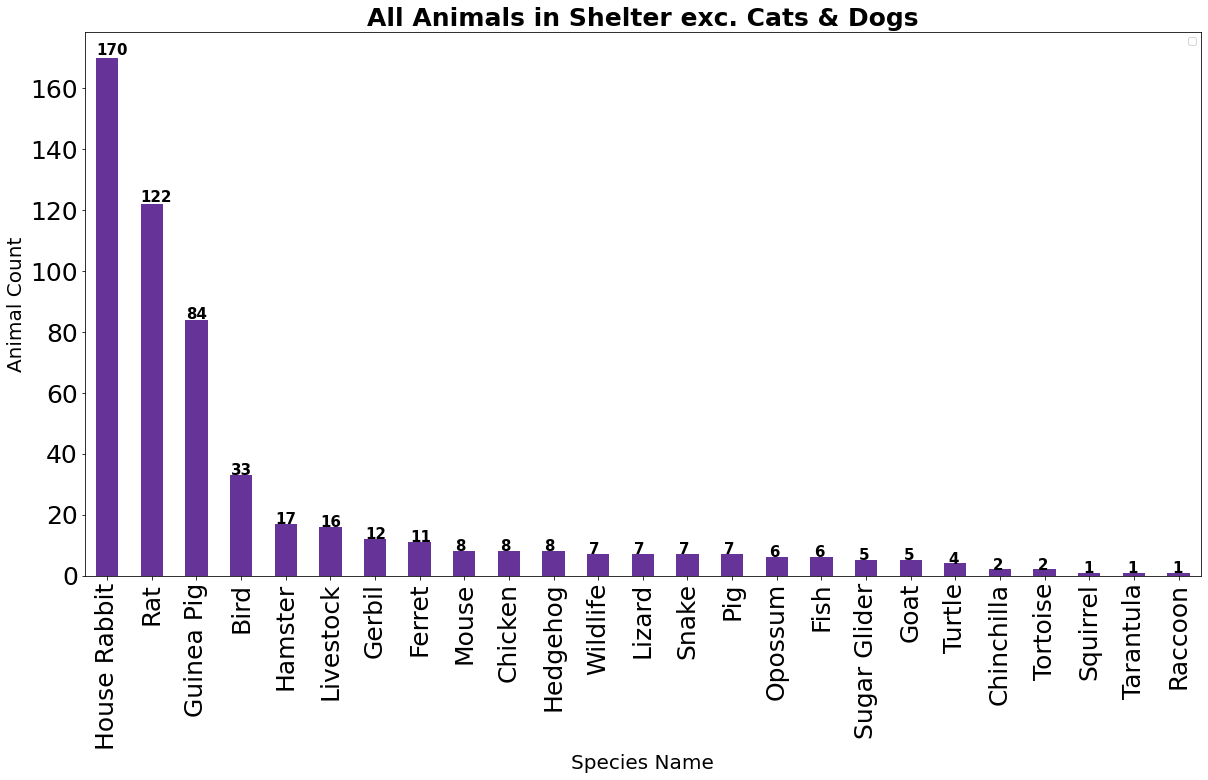

In [116]:
#Create Bar Graph representing animals that are NOT cats or dogs
Question1b = Question1.drop(index=["Cat","Dog"])
color=("rebeccapurple")
fig1=Question1b.plot(kind="bar", figsize=(20,10), fontsize=25, color=color)
for p in fig1.patches:
    fig1.annotate(str(p.get_height()), (p.get_x()*1.005, p.get_height()*1.005), fontsize=15, fontweight="bold")
plt.title("All Animals in Shelter exc. Cats & Dogs",fontsize=25, fontweight="bold")
plt.legend("")
plt.ylabel("Animal Count", fontsize=20)
plt.xlabel("Species Name", fontsize=20)
plt.show()



In [117]:
# Ratio of Males to Females in Cats and Dogs in the shelter

Question2a = Cleaned_Pet1[Cleaned_Pet1['speciesname']== "Cat"]
Question2b = Cleaned_Pet1[Cleaned_Pet1['speciesname']== "Dog"]
combined_Petdata = pd.merge(Question2a, Question2b , on= ["speciesname", "sexname"], how= 'outer')
combined_Petdata = combined_Petdata[["speciesname", "sexname"]]
combined_Petdata = combined_Petdata[combined_Petdata['sexname'] != 'Unknown']
combined_Petdata


,speciesname,sexname
0,Cat,Female
1,Cat,Female
2,Cat,Female
3,Cat,Female
4,Cat,Female
...,...,...
6714,Dog,Female
6715,Dog,Female
6716,Dog,Female
6717,Dog,Female


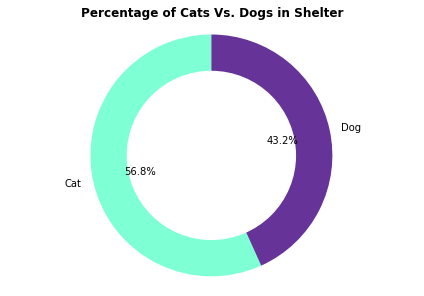

In [121]:
# Pie chart
count = combined_Petdata.value_counts()
labels = ['Cat', 'Dog']
sizes = [count[0]+count[1],count[2]+count[3]]
#colors
colors = ['aquamarine','rebeccapurple']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')                                                                                                                                                                            
plt.tight_layout()
plt.title("Percentage of Cats Vs. Dogs in Shelter", fontweight="bold", fontsize=12)
plt.show()




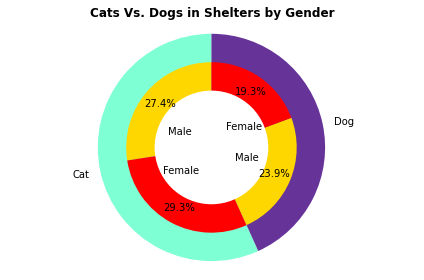

In [123]:

# Data to plot


labels = ['Cat', 'Dog']
sizes = [count[0]+count[1],count[2]+count[3]]
labels_gender = ['Male','Female','Male','Female']
sizes_gender = [count[1],count[0], count[2], count[3]]
colors = ['aquamarine', 'rebeccapurple']
colors_gender = ['gold','red','gold','red']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90,autopct="%1.1f%%", labels=labels_gender, pctdistance=.8, labeldistance=.3)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Cats Vs. Dogs in Shelters by Gender', fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [124]:
Cleaned_Pet1['intakedate']=pd.to_datetime(Cleaned_Pet1['intakedate'])

<ipython-input-124-2e11a6798f03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cleaned_Pet1['intakedate']=pd.to_datetime(Cleaned_Pet1['intakedate'])


In [125]:
Question3A = Cleaned_Pet1[['intakedate']]
Q3AYear=Question3A.groupby([Question3A["intakedate"].dt.year,Question3A["intakedate"].dt.month]).agg({'count'})
Q3AYear

intakedate
                           count
intakedate intakedate           
2009       11                  1
           12                  1
2012       8                   1
2013       1                   1
           3                   1
2015       6                   2
2016       10                  2
           11                  1
2017       1                   8
           2                  11
           3                 147
           4                 228
           5                 240
           6                 345
           7                 324
           8                 283
           9                 284
           10                271
           11                187
           12                179
2018       1                 169
           2                 157
           3                 169
           4                 186
           5                 328
           6                 309
           7                 264
           8                 296
           9                 293
           10                284
           11                213
           12                218
2019       1                 153
           2                 172
           3                 163
           4                 249
           5                 317
           6                 300
           7                 296
           8                 235

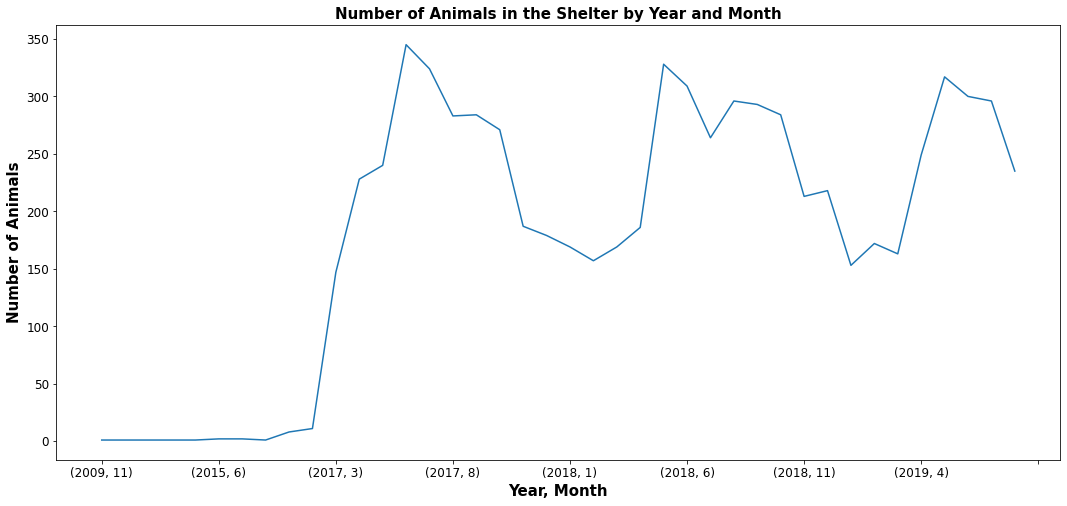

In [126]:
Q3AYear.plot.line(figsize=(18,8), legend=False, fontsize=12)
plt.title("Number of Animals in the Shelter by Year and Month", fontweight="bold", fontsize=15)
plt.xlabel("Year, Month", fontweight="bold", fontsize=15)
plt.ylabel("Number of Animals", fontweight="bold", fontsize=15)
plt.show()

In [129]:
Q3BAdoption=Cleaned_Pet1[['intakedate', 'movementtype']]
Q3BAdoption= Q3BAdoption[Q3BAdoption['movementtype']=='Adoption']
Q3BAdoption=Q3BAdoption.groupby([Q3BAdoption["intakedate"].dt.year,Q3BAdoption["intakedate"].dt.month]).agg({'count'})
Q3BAdoption= Q3BAdoption.drop(columns='movementtype')

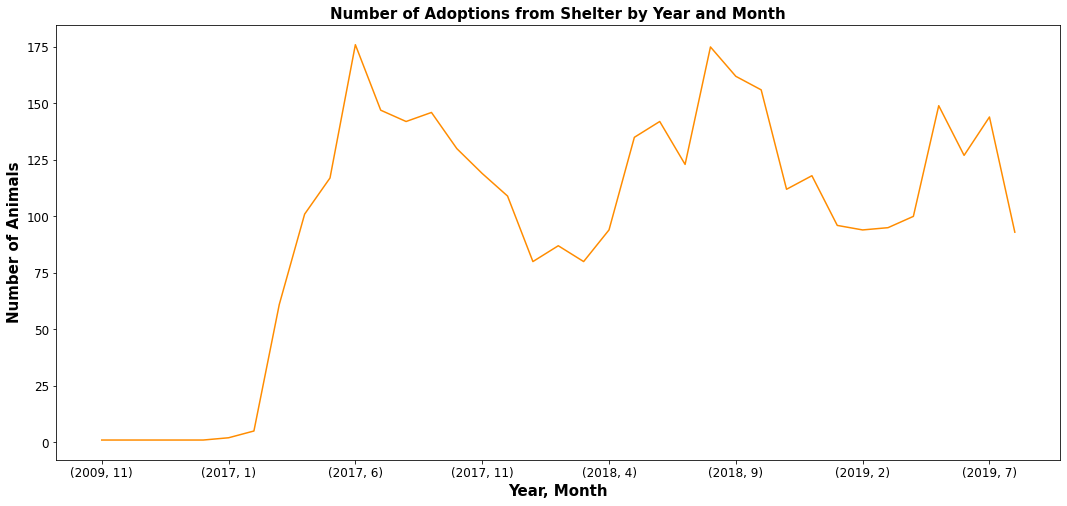

In [130]:
Q3BAdoption.plot.line( figsize=(18,8), legend=False, fontsize=12, color="darkorange")
plt.title("Number of Adoptions from Shelter by Year and Month", fontweight="bold", fontsize=15)
plt.xlabel("Year, Month", fontweight="bold", fontsize=15)
plt.ylabel("Number of Animals", fontweight="bold", fontsize=15)
plt.show()

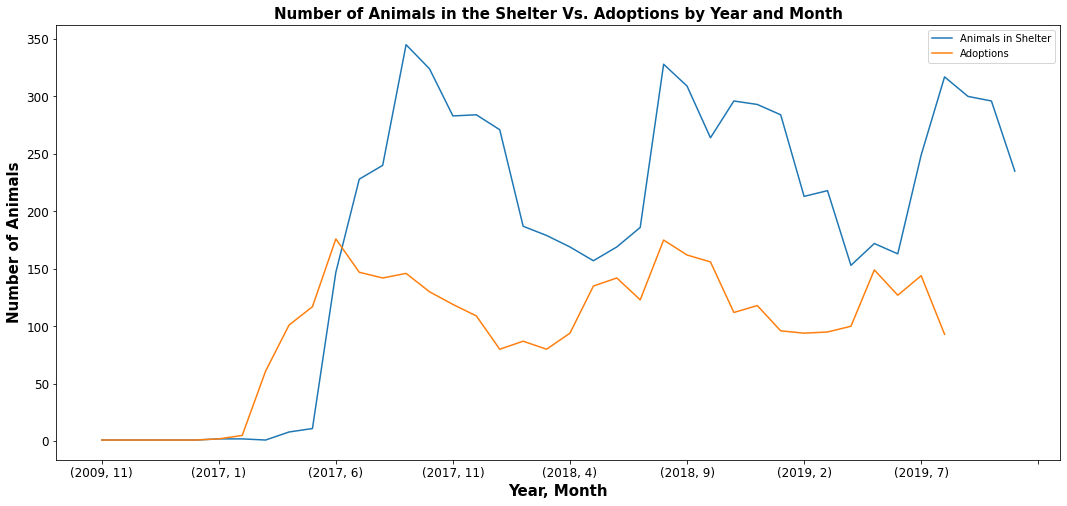

In [131]:
MultiplePlots = Q3AYear.plot(legend=False, label="Number of Animals")
Q3BAdoption.plot(ax= MultiplePlots,figsize=(18,8), legend=False, fontsize=12, label="Adoptions")
plt.title("Number of Animals in the Shelter Vs. Adoptions by Year and Month", fontweight="bold", fontsize=15)
plt.xlabel("Year, Month", fontweight="bold", fontsize=15)
plt.ylabel("Number of Animals", fontweight="bold", fontsize=15)
plt.legend(["Animals in Shelter","Adoptions"])
plt.show()